# Neural Networks for Data Science Applications
## Final Homework: Putting everything together

**Name**: *Debodeep Banerjee*

**Matricola**: *1901253*

Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

**Overview**: The homework is composed of four parts: (i) select a dataset; (ii) implement a custom component (ONLY if you did not submit the first homework); (iii) implement a neural network and train it on the dataset; (iv) perform a post-training operation on the method (interpretation / robustness / fairness).

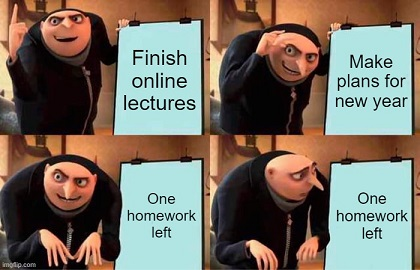

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install tensorflow
!pip install split-folders
!pip install lime
!pip install scikit-image

     |████████████████████████████████| 276kB 23.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=d7774bd4fe87d70b776e9246b93fabf82bba29a382150824ebb2fdc481587651
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [3]:
#Import necessary packages
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras import losses, optimizers, metrics, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import cv2
import os

**Important - before starting**: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*.

### Warm-up: Selecting a dataset

During the course, we were able to see only a small selection of datasets. For this homework, you are free to select any dataset that you believe interesting (images, audios, texts)... The task can be either classification or a more complex task (e.g., segmentation, sequence prediction, ...). *For tasks beyond classification, check carefully that the final exercise is viable before starting your implementation.*

A few repositories that you can look at:

1. The catalog of [TensorFlow Datasets](https://www.tensorflow.org/datasets/).
2. The [Kaggle catalog](https://www.kaggle.com/data). For downloading data from Kaggle on Google Colab, you will need to [load your Kaggle authentication token](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb).
3. The [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).

You are not bound to these; any open repository is okay. As a rule of thumb, the choice of dataset will not influence the mark, so you can select a complexity that you believe adequate to your skills.

**DESCRIPTION OF THE CODE**: The dataset consists of a total of 8566 images which essentially belong to various archelogical structures. The entire dataset is classified into 10 categories, viz. Altar, Apse,Bell tower, Column,Dome (inner),Dome (outer),Flying buttress,Gargoyle, Stained glass, Vault. The task is to deploy a CNN model so that the images can be classified accordingly. The dataset has been collected from the following link:https://old.datahub.io/dataset/architectural-heritage-elements-image-dataset

In [ ]:
# Insert any data loading code here. If the data loading part is complex,
# consider using a separate .py file that you can attach to the submission.
# We will split our data into train and test sets

#door= os.path.join('/content/drive/MyDrive/architecture')
#room= os.path.join('/content/drive/MyDrive/architecture/train_test_splitted/')

# We will split and allocate the folders

#splitfolders.ratio(door, room, seed=0000, ratio=(0.70,0.20,0.10), group_prefix= None)

In [4]:
def augment(image):
    image = tf.image.random_brightness(image, 0.1)
    image=tf.image.random_flip_up_down(image)
    #image=tf.image.random_contrast(image,0.1)
    image=tf.image.random_hue(image,0.1)
    image = tf.image.random_flip_left_right(image)
    return image

In [5]:
train=ImageDataGenerator(rescale=1/255.0,preprocessing_function=augment)
val=ImageDataGenerator(rescale=1/255.0)
test=ImageDataGenerator(rescale=1/255.0)

In [6]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/architecture/train_test_splitted/train",
                                        target_size=(100,100),
                                        batch_size=128,
                                        shuffle=True,
                                        color_mode="rgb",
                                        class_mode='categorical')

val_dataset=val.flow_from_directory("/content/drive/MyDrive/architecture/train_test_splitted/val",
                                        target_size=(100,100),
                                        batch_size=128,
                                        shuffle=True,
                                        color_mode="rgb",
                                        class_mode='categorical')
test_dataset=train.flow_from_directory("/content/drive/MyDrive/architecture/train_test_splitted/test",
                                        target_size=(100,100),
                                        batch_size=128,
                                        shuffle=True,
                                        color_mode="rgb",
                                        class_mode='categorical')

Found 5993 images belonging to 10 classes.
Found 1710 images belonging to 10 classes.
Found 863 images belonging to 10 classes.


In [7]:
# ... just to check the classes

print(train_dataset.class_indices)


{'altar': 0, 'apse': 1, 'bell_tower': 2, 'column': 3, 'dome(inner)': 4, 'dome(outer)': 5, 'flying_buttress': 6, 'gargoyle': 7, 'stained_glass': 8, 'vault': 9}


### Exercise 1: Implement a custom object (5 points)

**This exercise is required only for students that have not submitted the mid-term homework, or for students who want to raise their mid-term mark (mark <= 3/5). For a mark of 4/5, an additional point can also be recovered during the exam.**

**To recap**: if you submitted the mid-term homework, implement only Exercises 2 and 3, for a total of *10 points*. If you did not submit the mid-term homework, implement Exercises 1, 2, and 3 for a total of *15 points*. 

[Papers With Code](https://paperswithcode.com/methods) is a repository of state-of-the-art tasks and components for deep networks, including:

1. [Optimizers](https://paperswithcode.com/methods/category/optimization)
2. [Residual components](https://paperswithcode.com/methods/category/skip-connection-blocks)
3. [Attention mechanisms](https://paperswithcode.com/methods/category/attention-mechanisms)
4. [Regularizers](https://paperswithcode.com/methods/category/regularization)
5. [Activation functions](https://paperswithcode.com/methods/category/activation-functions)
6. [Normalization blocks](https://paperswithcode.com/methods/category/normalization)
7. [Loss functions](https://paperswithcode.com/methods/category/loss-functions)
8. [Variants of feedforward networks](https://paperswithcode.com/methods/category/feedforward-networks)

Select a component in the categories above **not covered during the course**, and provide a working implementation in **TensorFlow 2.x**. A re-implementation is preferable; if you use an open implementation, state it clearly below. If you re-use parts of an open implementation, also state it clearly below.

**DESCRIPTION OF THE CODE**: *provide a small description of the method you have implemented, with all necessary links. If needed, explain why it is useful for the task you have selected (e.g., if implementing a different loss function).*

In [ ]:
# Insert your custom component here
class MyCustomDropout(tf.keras.Layer):
  # ...

In [ ]:
# Optionally, briefly show how the component can be used

### Exercise 2: Train on your data (5 points)

This part is straightforward: create a model, according to everything we saw in the course, and train it on the data you have loaded. If you did Exercise 1, **include your custom component here**. Otherwise, you are free to use any components that were not included in the course (layers, losses, metrics, ...), provided you give a brief description below.

**DESCRIPTION OF THE CODE**: For the classification task, here a neural network setup has been considered. Each block contains a kernel of size 3, one batch normalization layer and one max pool layer with window size 2. In order to prevent the model from overfitting, we considered l2 regularization. 

The task is to predict whether a system is stable or unstable.

In [ ]:
train_dataset.image_shape

(100, 100, 3)

In [8]:
model = Sequential([
                    Conv2D(
                          16, kernel_size=3, strides=2, 
                          padding='SAME',activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(1e-3),
                          input_shape = (100,100,3)
                          ),
                    
                    layers.BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(
                          32, kernel_size=3, strides=2, 
                          padding='SAME',activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(1e-3)
                          ),
                    
                    layers.BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(
                          64, kernel_size=3, strides=2, 
                          padding='SAME',activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(1e-3)
                          ),
                    layers.BatchNormalization(), 
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          1

In [10]:

model.compile(loss='CategoricalCrossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_path = "best_model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

erlstop=EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
checkpoint=ModelCheckpoint(filepath=checkpoint_path, save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)

In [32]:
# With early stopping, we can specify a very large number of epochs, since we have 
# an external termination condition.
history=model.fit(train_dataset, epochs=100, 
          validation_data=val_dataset,
          callbacks=[erlstop, checkpoint])

Epoch 1/100
47/47 [==============================] - 26s 552ms/step - loss: 1.1995 - accuracy: 0.5920 - val_loss: 2.5788 - val_accuracy: 0.0819
INFO:tensorflow:Assets written to: best_model/cp.ckpt/assets
Epoch 2/100
47/47 [==============================] - 23s 500ms/step - loss: 1.1158 - accuracy: 0.6242 - val_loss: 2.4669 - val_accuracy: 0.1439
INFO:tensorflow:Assets written to: best_model/cp.ckpt/assets
Epoch 3/100
47/47 [==============================] - 23s 497ms/step - loss: 1.0256 - accuracy: 0.6586 - val_loss: 2.8631 - val_accuracy: 0.1368
Epoch 4/100
47/47 [==============================] - 23s 498ms/step - loss: 0.9597 - accuracy: 0.6791 - val_loss: 2.1230 - val_accuracy: 0.3526
INFO:tensorflow:Assets written to: best_model/cp.ckpt/assets
Epoch 5/100
47/47 [==============================] - 23s 499ms/step - loss: 0.9080 - accuracy: 0.6978 - val_loss: 2.2315 - val_accuracy: 0.3275
Epoch 6/100
47/47 [==============================] - 24s 504ms/step - loss: 0.8673 - accuracy: 0.

In [33]:
model.evaluate(test_dataset)

7/7 [==============================] - 3s 460ms/step - loss: 0.8106 - accuracy: 0.7416


[0.8106478452682495, 0.7415990829467773]

In [34]:
best_model=tf.keras.models.load_model(checkpoint_path)

In [35]:
print("Loss and accuracy on the test data is", best_model.evaluate(test_dataset))

7/7 [==============================] - 3s 440ms/step - loss: 0.8269 - accuracy: 0.7289
Loss and accuracy on the test data is [0.8269043564796448, 0.7288528680801392]


In [40]:
def visual_train_val_loss_acc(history):

  #plot of loss 
  plt.plot(history.history['loss'], color='red', label='Train_loss')
  plt.plot(history.history['val_loss'], color='purple',label='Validation loss')
  plt.title("Comparison of training and validation loss")
  plt.axis()
  plt.grid()
  plt.legend()
  plt.show()
  # plot of accuracy
  plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')
  plt.plot(history.history['val_accuracy'], color='green',label='Validation accuracy')
  plt.title("Comparison of training and validation accuracy")
  plt.axis()
  plt.grid()
  plt.legend()
  plt.show()

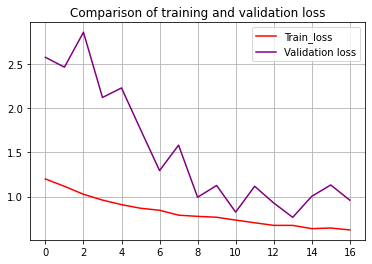

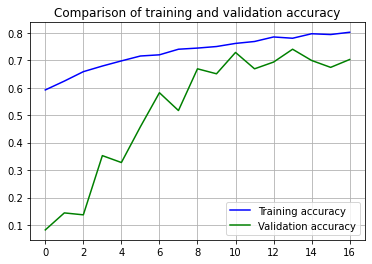

In [41]:
_ = visual_train_val_loss_acc(history)

In [42]:
# Function for prediction

def image_data(image_data,shape1,shape2):
  #read image
    img = cv2.imread(image_data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(img)
    plt.title('Original image')
    plt.axis('off')
    # resize and reshape the image
    img_resize = (cv2.resize(img, dsize=(shape1,shape2), interpolation=cv2.INTER_CUBIC))/255.
    img_reshape = img_resize[np.newaxis,...]
    return img_reshape

In [43]:
# Application
input_1=os.path.join('/content/drive/MyDrive/architecture/dome(outer)/10050306154_64cd345ca5.jpg')
input_2=os.path.join('/content/drive/MyDrive/architecture/vault/10037324714_ca79f1e2ec_m.jpg')


This image is a: dome(outer)
('The highest probability is ', 0.885468)


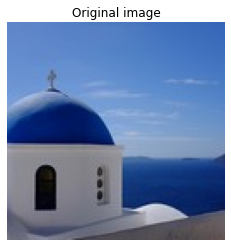

In [44]:
subject=image_data(input_1,100,100)
predicted=model.predict(subject)
outcome="The highest probability is ", predicted.max()
category=list(train_dataset.class_indices)
image_class=category[np.argmax(predicted)]
print("This image is a:", image_class)
print (outcome)

Our model gave a correct prediction the probability of being a dome is 0.88.

So, in a nutshell, we can claim that the model seems to work fine and we don't need to opt for any other model. 

This image is a: vault
('The highest probability is ', 0.9353227)


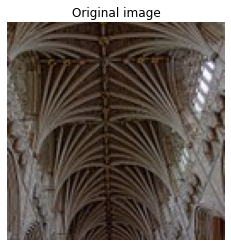

In [45]:
subject=image_data(input_2,100,100)
predicted=best_model.predict(subject)
outcome="The highest probability is ", predicted.max()
category=list(train_dataset.class_indices)
image_class=category[np.argmax(predicted)]
print("This image is a:", image_class)
print(outcome)

In this case also the prediction is correct with a probability of 0.93

### Exercise 3 (5 points)

Training a model is only the beginning! Select **one of the three** paths below, and follow the instructions.

1. **Interpreting your model**: interpretability is critical in many applications. Good libraries for obtaining interpetations from your model are [tf-explain](https://github.com/sicara/tf-explain), the original [LIME implementation](https://github.com/marcotcr/lime), and IBM [AIX360 Toolbox](https://github.com/Trusted-AI/AIX360). For this path, select an interpretability method, *read carefully the original paper*, and test it on one of your input examples. You can use one of the basic methods seen in the course, or a more advanced variant (e.g., Gradients*Input, Integrated Gradients, ...).

2. **Attacking your model**: there are a number of libraries for crafting an adversarial attack. Possible alternatives are [CleverHans](https://github.com/tensorflow/cleverhans), [Foolbox](https://github.com/bethgelab/foolbox), or the [Adversarial Robustness Toolbox](https://github.com/Trusted-AI/adversarial-robustness-toolbox). Select one white-box adversarial attack, *read carefully the original paper*, and create an adversarial attack on your network. You can use FGSM as seen in the course, or a more advanced method (e.g., JSMA, ...).

3. **Fairness**: finally, you might want to evaluate whether your model is fair. Good libraries for this are [FAT Forensics](https://fat-forensics.org/) or IBM [AIF360 Toolbox](https://github.com/Trusted-AI/AIF360). For this exercise, select a fairness metric, and evaluate the group fairness on your dataset. Then, apply a post-processing to enforce the fairness, and evaluate the eventual variation in accuracy.

**DESCRIPTION OF THE CODE**:
Here we want to check the interpretability of the model using the Lime package. The lime package helps to find the answer to one of a fundamental question based on a model, that is, "Why should we trust the model?". As we have worked on a image data, we use lime_image module. The basic workflow is to train the data with lime explsiner and then select a specific sample from the test data and check its interpretability. The codes for lime interpretation is influenced from the [tutorial site](https://github.com/marcotcr/lime)

In [46]:
# Your code here
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

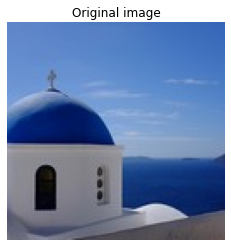

In [47]:
explainer = lime_image.LimeImageExplainer()

subject1=image_data(input_1,100,100)

In [48]:
explanation = explainer.explain_instance(subject1[0].astype('double'), best_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

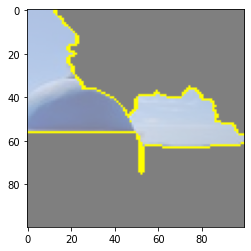

In [49]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=3, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

The image above illustrates the top 3 super pixels which helps the model to identify the image as a *vault*. The number of top super pixels are determined by the variable *num_features*. Here I have taken the value as 3. However, changing the value of the *num_features* will have significant effect on the resulting image, in the sense that, if we increase the value, the black portion will be reduced and vice versa.

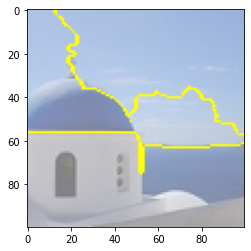

In [50]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

This picture illustrate the same issue as mentioned above, the only difference is that the black shade in missing and we can see how the yellow border line separates the top super pixel position from the rest of the image.

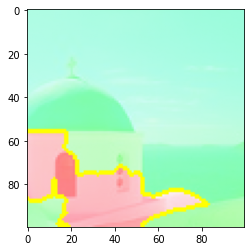

In [51]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

The above image describes the positive and negative areas, in the sense that the green region describes the area which helps the model to predict it as a vault and the red part decreases the probability of being classified as a vault.

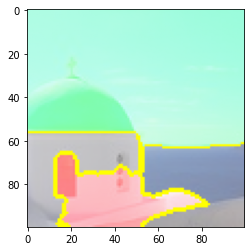

In [52]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.05)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

This image is almost same. The only difference is that it selects only those parts which has a minimum weight of 0.05.

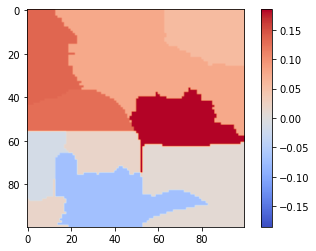

In [53]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'coolwarm', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

This images represents a colorbar heatmap which eventually describes the weights for the prediction.

*Reference*
1. https://github.com/marcotcr/lime
2. https://towardsdatascience.com/interpreting-image-classification-model-with-lime-1e7064a2f2e5

### Final checklist

1. Carefully check all textual descriptions and the code. Insert comments when needed.
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

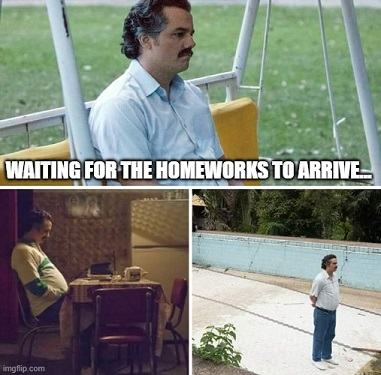